In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 252
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
    
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) # it is showing 68 bcz a batch is having 32 images each if we multiply batches to 68 we get total no of pics

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 252, 252, 3)
[1 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[175.99207  174.99207  182.99207 ]
  [170.0875   169.0875   177.0875  ]
  [172.00824  171.00824  179.00824 ]
  ...
  [144.17384  141.17384  148.17384 ]
  [130.36287  127.36288  134.36287 ]
  [111.22139  108.22139  115.22139 ]]

 [[180.95276  179.95276  187.95276 ]
  [175.12018  174.12018  182.12018 ]
  [178.09618  177.09618  185.09618 ]
  ...
  [135.16612  132.16612  139.16612 ]
  [130.98004  127.98005  134.98004 ]
  [119.89701  116.89701  123.89701 ]]

 [[180.73047  179.73047  187.73047 ]
  [176.92159  175.92159  183.92159 ]
  [181.88254  180.88254  188.88254 ]
  ...
  [136.8618   133.8618   140.8618  ]
  [125.32609  122.32609  129.3261  ]
  [112.182    109.182    116.182   ]]

 ...

 [[166.7461   161.7461   165.7461  ]
  [169.70038  164.70038  168.70038 ]
  [168.68102  163.68102  167.68102 ]
  ...
  [128.42853  120.42853  118.42853 ]
  [128.19742  120.19742  118.19742 ]
  [132.08797  124.08797  122.08797 ]]

 [[163.11896  158.11896  162.11896 ]
  [166.07135  161.07135  1

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())# The colour is represented b/w 0-225

[[[174.99213 176.99213 189.99213]
  [174.10318 176.10318 189.10318]
  [178.16699 180.16699 193.16699]
  ...
  [167.07298 165.07298 176.07298]
  [158.18292 156.18292 167.18292]
  [157.96825 155.96825 166.96825]]

 [[174.97638 176.97638 189.97638]
  [175.09525 177.09525 190.09525]
  [179.19746 181.19746 194.19746]
  ...
  [166.23009 164.23009 175.23009]
  [154.30757 152.30757 163.30757]
  [154.09467 152.09467 163.09467]]

 [[174.00793 176.00793 189.00793]
  [175.09335 177.09335 190.09335]
  [179.0778  181.0778  194.0778 ]
  ...
  [164.0349  162.0349  173.0349 ]
  [155.2859  153.2859  164.2859 ]
  [158.29182 156.29182 167.29182]]

 ...

 [[203.91304 202.91304 210.91304]
  [202.91365 201.91365 209.91365]
  [200.92221 199.92221 207.92221]
  ...
  [175.27614 172.27614 179.27614]
  [170.31636 167.31636 174.31636]
  [166.30876 163.30876 170.30876]]

 [[203.98431 202.98431 210.98431]
  [201.99942 200.99942 208.99942]
  [200.92064 199.92064 207.92064]
  ...
  [170.27669 167.27669 174.27669]
  [1

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)

(32, 252, 252, 3)


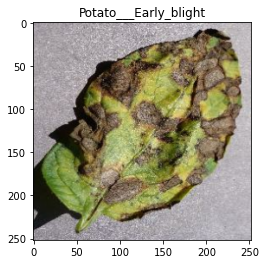

In [10]:
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    

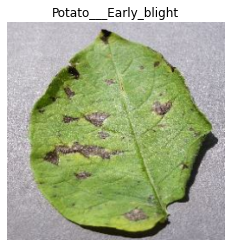

In [11]:
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

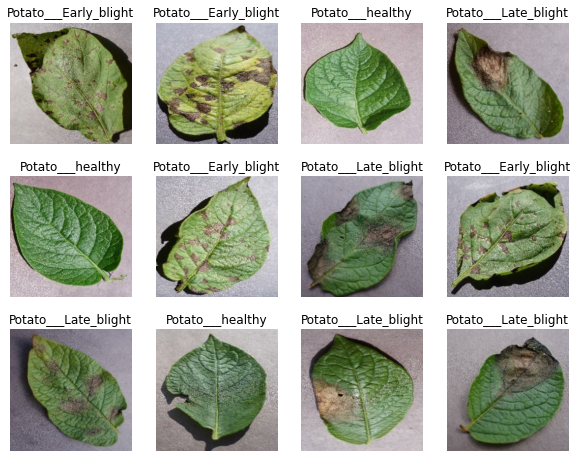

In [12]:
plt.figure(figsize=(10,8))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [13]:
len(dataset)

68

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [19]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [20]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [21]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 256  # or your desired image size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
])

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

E:\TUBA\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

54/54 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.4923 - loss: 0.9519 - val_accuracy: 0.4635 - val_loss: 0.8676


In [35]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5309 - loss: 0.8637 - val_accuracy: 0.6615 - val_loss: 0.6840
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7196 - loss: 0.6321 - val_accuracy: 0.7240 - val_loss: 0.6777
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8111 - loss: 0.4460 - val_accuracy: 0.8281 - val_loss: 0.4088
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8724 - loss: 0.3106 - val_accuracy: 0.8958 - val_loss: 0.2800
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8971 - loss: 0.2611 - val_accuracy: 0.9062 - val_loss: 0.2972
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.8976 - loss: 0.2495 - val_accuracy: 0.9115 - val_loss: 0.2371
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9100 - loss: 0.2131 - val_accuracy: 0.9271 - val_loss: 0.1513
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9384 - loss: 0.1728 - val_accuracy: 0.8906 - v

In [36]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9626 - loss: 0.0692


In [37]:
scores

[0.06924957782030106, 0.96875]

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
history.history['accuracy']

[0.5792824029922485,
 0.7471064925193787,
 0.8350694179534912,
 0.8796296119689941,
 0.9039351940155029,
 0.8969907164573669,
 0.9178240895271301,
 0.9143518805503845,
 0.9236111044883728,
 0.9461805820465088,
 0.9450231194496155,
 0.9548611044883728,
 0.9513888955116272,
 0.9803240895271301,
 0.9751157164573669,
 0.9577546119689941,
 0.9704861044883728,
 0.9745370149612427,
 0.9837962985038757,
 0.9745370149612427,
 0.9675925970077515,
 0.9745370149612427,
 0.9733796119689941,
 0.9745370149612427,
 0.9780092835426331,
 0.9890046119689941,
 0.9878472089767456,
 0.9878472089767456,
 0.9797453880310059,
 0.9809027910232544,
 0.9803240895271301,
 0.9895833134651184,
 0.9884259104728699,
 0.9895833134651184,
 0.9878472089767456,
 0.9849537014961243,
 0.9861111044883728,
 0.9924768805503845,
 0.9930555820465088,
 0.9849537014961243,
 0.96875,
 0.9751157164573669,
 0.9774305820465088,
 0.9953703880310059,
 0.9797453880310059,
 0.9849537014961243,
 0.9901620149612427,
 0.9942129850387573,
 0.

In [42]:
len(history.history['accuracy'])

50

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

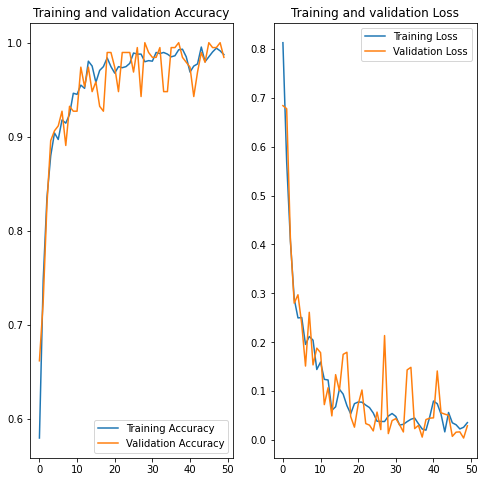

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')
plt.show()


Text(0.5, 1.0, 'Training and validation Accuracy')

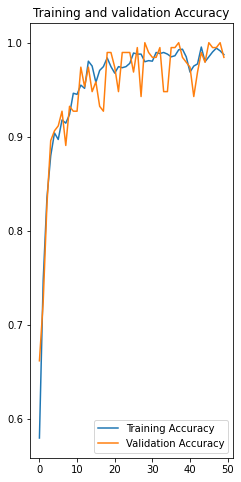

In [45]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

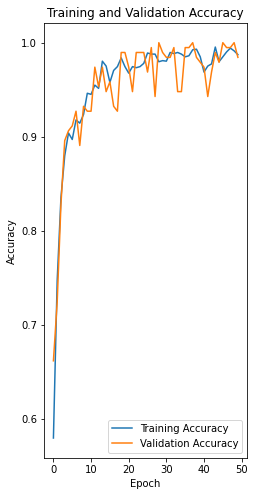

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')  # Use len(acc) if EPOCHS is not 50
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')  # Use len(val_acc) if EPOCHS is not 50
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


In [47]:
for images_batch ,labels_batch in test_ds.take(1):
    
    print(images_batch[0].numpy())

[[[175.91496 156.91496 158.91496]
  [177.89815 158.89815 160.89815]
  [166.86198 147.86198 149.86198]
  ...
  [172.15236 159.15236 166.15236]
  [177.96838 164.96838 171.96838]
  [178.93785 165.93785 172.93785]]

 [[163.55688 144.55688 146.55688]
  [200.30101 181.30101 183.30101]
  [194.34203 175.34203 177.34203]
  ...
  [185.89128 172.89128 179.89128]
  [191.89526 178.89526 185.89526]
  [172.27687 159.27687 166.27687]]

 [[173.74791 154.74791 156.74791]
  [176.49545 157.49545 159.49545]
  [157.72058 138.72058 140.72058]
  ...
  [171.19353 158.19353 165.19353]
  [193.01541 180.01541 187.01541]
  [177.0918  164.0918  171.0918 ]]

 ...

 [[200.40366 185.40366 192.40366]
  [169.96783 154.96783 161.96783]
  [148.87483 133.87483 140.87483]
  ...
  [170.59824 157.59824 167.59824]
  [168.4887  155.4887  165.4887 ]
  [165.26337 152.26337 162.26337]]

 [[167.0363  152.0363  159.0363 ]
  [191.85814 176.85814 183.85814]
  [165.92389 150.92389 157.92389]
  ...
  [172.92769 159.92769 169.92769]
  [1

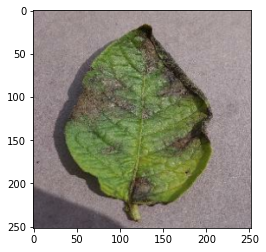

In [48]:
for images_batch ,labels_batch in test_ds.take(1):
    
    plt.imshow(images_batch[0].numpy().astype('uint8'))

In [49]:
np.argmax([9.9999964e-01, 3.9333537e-07,1.1586251e-18])

0

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0


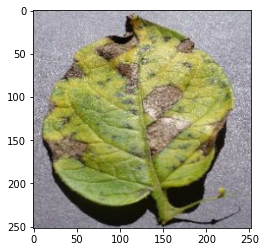

In [50]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(np.argmax(batch_prediction[0]))

first image to predict:
actual label Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
predicted label: Potato___Early_blight


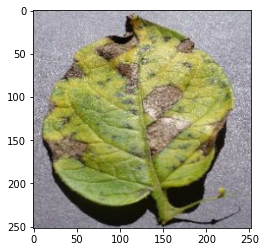

In [51]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict:")
    plt.imshow(first_image)
    print("actual label",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

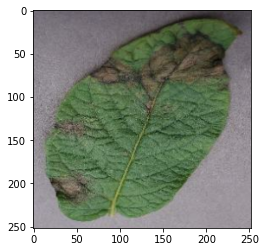

In [53]:
for images, labels in test_ds.take(1):
    for i in range(9):
        plt.imshow(images[i].numpy().astype("uint8"))


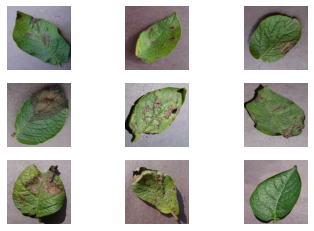

In [54]:
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")